# <font color="orange"> Первичный анализ данных

In [ ]:
!pip3 install datasets --break-system-packages

Далее будут рассмотрены несколько датасетов, на которых будет обучаться наша модель суммаризации текстов. Нами было найдено большое количетство качественных датасетов суммаризации новостей, именно поэтому базовая версия нашего суммаризатора будет нацелена на суммаризацию текстов.

## <font color="orange"> Датасет Gazeta

In [102]:
from datasets import load_dataset, concatenate_datasets
dataset_gazeta = load_dataset('IlyaGusev/gazeta', revision="v2.0")

In [103]:
dataset_gazeta

DatasetDict({
    train: Dataset({
        features: ['text', 'summary', 'title', 'date', 'url'],
        num_rows: 60964
    })
    test: Dataset({
        features: ['text', 'summary', 'title', 'date', 'url'],
        num_rows: 6793
    })
    validation: Dataset({
        features: ['text', 'summary', 'title', 'date', 'url'],
        num_rows: 6369
    })
})

In [104]:
train_data = dataset_gazeta['train']
valid_data = dataset_gazeta['validation']
test_data = dataset_gazeta['test']

In [105]:
data_gazeta = concatenate_datasets([train_data, valid_data, test_data])

In [106]:
data_gazeta[:3]

{'text': ['Сегодня транспортный налог начисляется в зависимости от мощности автомобиля, причем цена для «сильных» машин выше, чем для малолитражек. Также ставку налога могут корректировать региональные власти: согласно Налоговому кодексу, базовый тариф, установленный правительством, может быть уменьшен в пять раз или увеличен до 10 раз. Сборы идут в региональные бюджеты, откуда растекаются на общие нужды. Транспортный налог — один из основных источников бюджетных доходов — предлагается направить исключительно на дорожные фонды. Так, автомобилисты будут понимать, за что они платят, а дорожники будут иметь гарантированный доход. Кроме налога дорожные фонды будут пополняться за счет бюджетных средств и проезда по платным дорогам. Более того, транспортный налог предлагается завуалировать в акцизы на бензин. Привычную и раздражающую систему ежегодной оплаты квитанции предлагается изменить, включив налог в стоимость топлива. Минэкономразвития говорит об удвоении акцизы, которая сегодня соста

### <font color="orange"> Посмотрим распределения данных

In [1]:
import pandas as pd
import numpy as np

In [108]:
df = pd.DataFrame(data_gazeta['date'], columns=["datetime"])
df["date"] = pd.to_datetime(df["datetime"]).dt.date

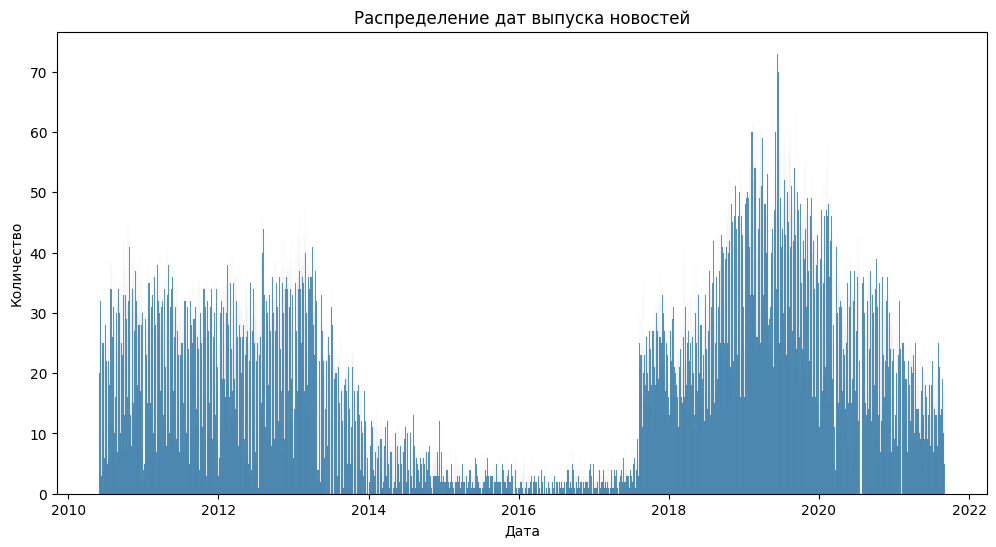

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Распределение дат выпуска новостей")
ax.set_ylabel("Количество")
ax.set_xlabel("Дата")
s1 = sns.histplot(ax=ax, data=df, x="date")

In [110]:
df = pd.DataFrame(data_gazeta['text'], columns=["text"])
df['len_text'] = df['text'].transform(lambda x: len(x))

df1 = pd.DataFrame(data_gazeta['summary'], columns=["text"])
df1['len_text'] = df1['text'].transform(lambda x: len(x))

<Axes: title={'center': 'Распределение длин исходных текстов'}, xlabel='len_text', ylabel='Count'>

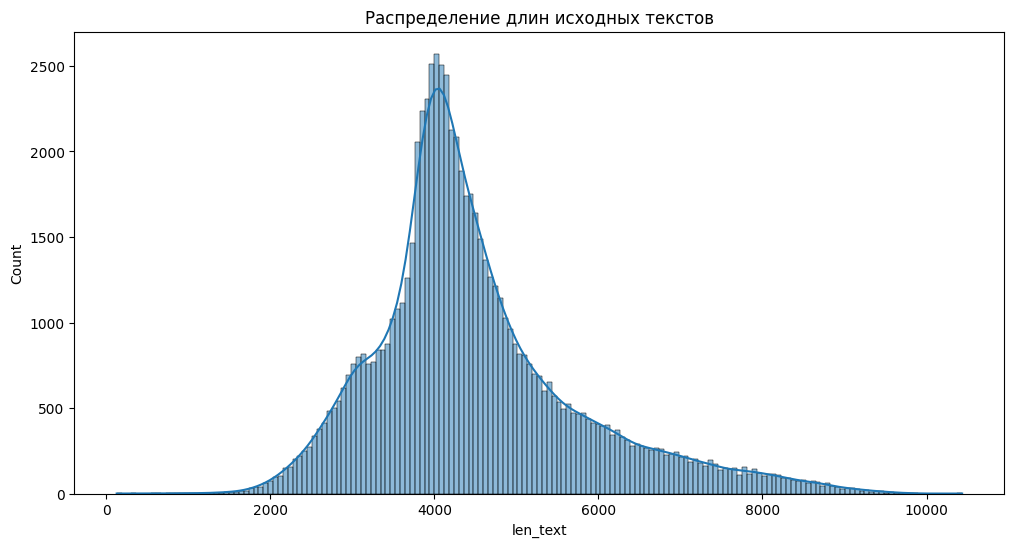

In [111]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов")
sns.histplot(data=df, x="len_text", kde=True)

<Axes: title={'center': 'Распределение длин суммаризаций'}, xlabel='len_text', ylabel='Count'>

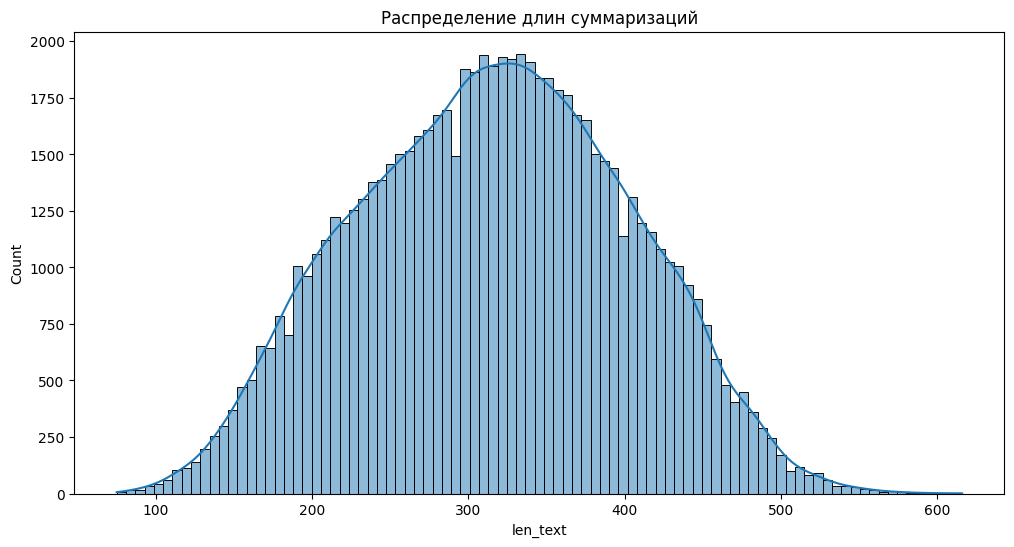

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин суммаризаций")
sns.histplot(data=df1, x="len_text", kde=True)

In [55]:
df = pd.concat([df, df1], axis=0, ignore_index=True)
df["class"] = np.where(df.index <= 60963, "Full", "Summarized")

In [56]:
df

,text,len_text,class
0,Сегодня транспортный налог начисляется в завис...,4141,Full
1,Словосочетание «музыкальный кинофестиваль» уже...,3900,Full
2,После более чем 12-часовых консультаций Совет ...,2377,Full
3,"Жертвами урагана «Агата», обрушившегося на Цен...",3031,Full
4,Решение ограничить рост тарифов естественных м...,3040,Full
...,...,...,...
148247,Первый пуск американской частной ракеты Alpha ...,262,Summarized
148248,Городская агломерация Владивостока может дости...,440,Summarized
148249,Из-за геополитической и экономической роли Рос...,445,Summarized
148250,Международная группа астрономов впервые наблюд...,273,Summarized


<Axes: title={'center': 'Распределение длин текстов и их суммаризаций'}, xlabel='len_text', ylabel='Count'>

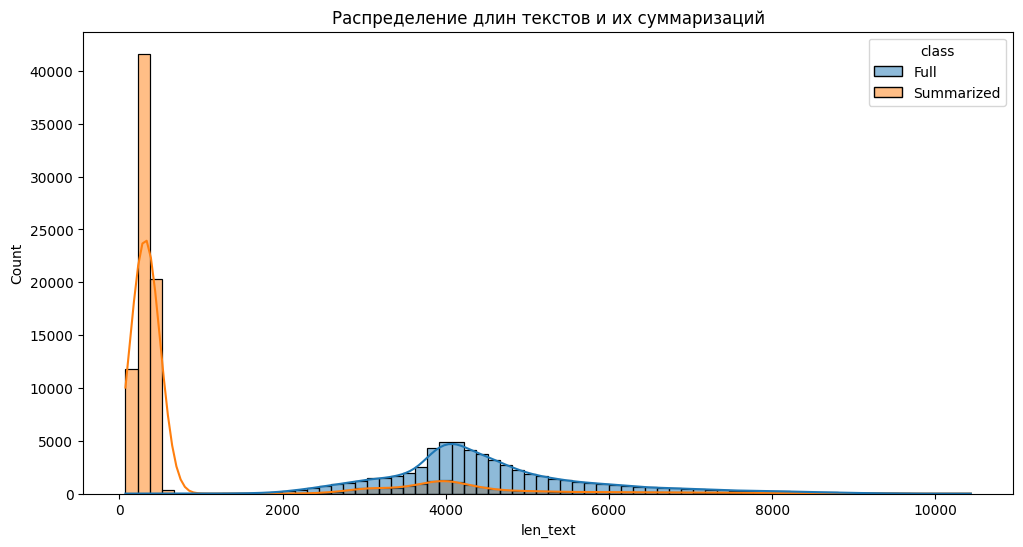

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин текстов и их суммаризаций")
sns.histplot(data=df, x="len_text", hue="class", kde=True)

In [58]:
combined_text = " ".join(data_gazeta["text"])
words = combined_text.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в исходных текстах:", len(unique_words))

combined_summarized = " ".join(data_gazeta["summary"])
words = combined_summarized.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в суммаризированных текстах:", len(unique_words))

Количество уникальных слов в исходных текстах: 1471032
Количество уникальных слов в суммаризированных текстах: 274817


In [59]:
from collections import Counter

In [60]:
words = combined_text.split()
words = [word.lower() for word in words if word.isalpha() and len(word) > 3]
word_freq = Counter(words)
top_words = word_freq.most_common(10)
print("Топ-10 слов в исходных текстах:", top_words)

words = combined_summarized.split()
words = [word.lower() for word in words if word.isalpha() and len(word) > 3]
word_freq = Counter(words)
top_words = word_freq.most_common(10)
print("Топ-10 слов в суммаризированных текстах:", top_words)

Топ-10 слов в исходных текстах: [('также', 126290), ('после', 107707), ('будет', 91990), ('этом', 89573), ('россии', 81010), ('года', 80458), ('было', 75409), ('только', 69774), ('время', 69414), ('которые', 68714)]
Топ-10 слов в суммаризированных текстах: [('россии', 10981), ('после', 7993), ('также', 6658), ('будет', 6320), ('может', 6191), ('этом', 5709), ('который', 4541), ('ранее', 4353), ('время', 4319), ('президент', 4246)]


In [77]:
data_gazeta.shape

(74126, 5)

In [ ]:
total_data = pd.DataFrame({
    "text": data_gazeta['text'],
    "summary": data_gazeta['summary']
}).sample(frac=1, random_state=42).reset_index(drop=True)

## <font color="orange"> XLSUM

In [62]:
dataset_xlsum = load_dataset("csebuetnlp/xlsum", "russian")

In [63]:
dataset_xlsum

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 62243
    })
    test: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 7780
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'summary', 'text'],
        num_rows: 7780
    })
})

In [64]:
train_xlsum = dataset_xlsum["train"]
valid_xlsum = dataset_xlsum["validation"]
test_xlsum = dataset_xlsum["test"]

In [65]:
data_xlsum = concatenate_datasets([train_xlsum, valid_xlsum, test_xlsum])

In [66]:
df_text = pd.DataFrame({
    "text": data_xlsum['text'],
    "summary": data_xlsum['summary']
})

df_text['len_text'] = df_text['text'].transform(lambda x: len(x))
df_text['len_summary'] = df_text['summary'].transform(lambda x: len(x))

<Axes: title={'center': 'Распределение длин исходных текстов'}, xlabel='len_text', ylabel='Count'>

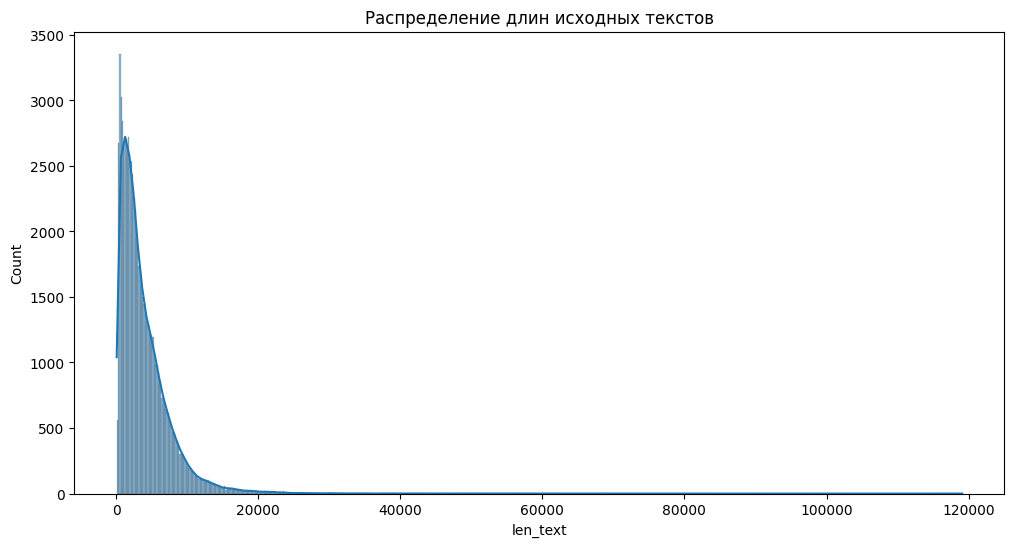

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов")
sns.histplot(data=df_text, x="len_text", kde=True)

<Axes: title={'center': 'Распределение длин суммаризаций'}, xlabel='len_summary', ylabel='Count'>

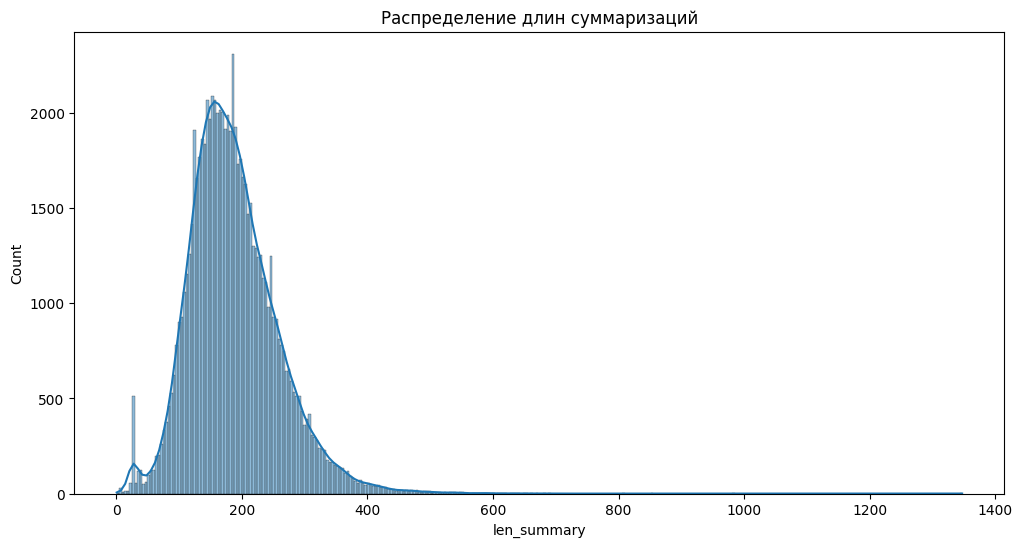

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин суммаризаций")
sns.histplot(data=df_text, x="len_summary", kde=True)

Видим, что в данном датасете присутствуют очень длинные новости, возможно (обсудим это далее), стоит удалить подобные объекты, т.к. мы хотим иметь более-менее похожие датасеты.

Воспользуемся правилом трех сигм, но только для правой границы длины текстов

In [69]:
mean = np.mean(df_text["len_text"])
std = np.std(df_text["len_text"])
three_sigma = mean + 3 * std
three_sigma

15004.794028782637

In [70]:
df_text = df_text[df_text['len_text'] <= three_sigma]

<Axes: title={'center': 'Распределение длин исходных текстов после очистки от больших объектов'}, xlabel='len_text', ylabel='Count'>

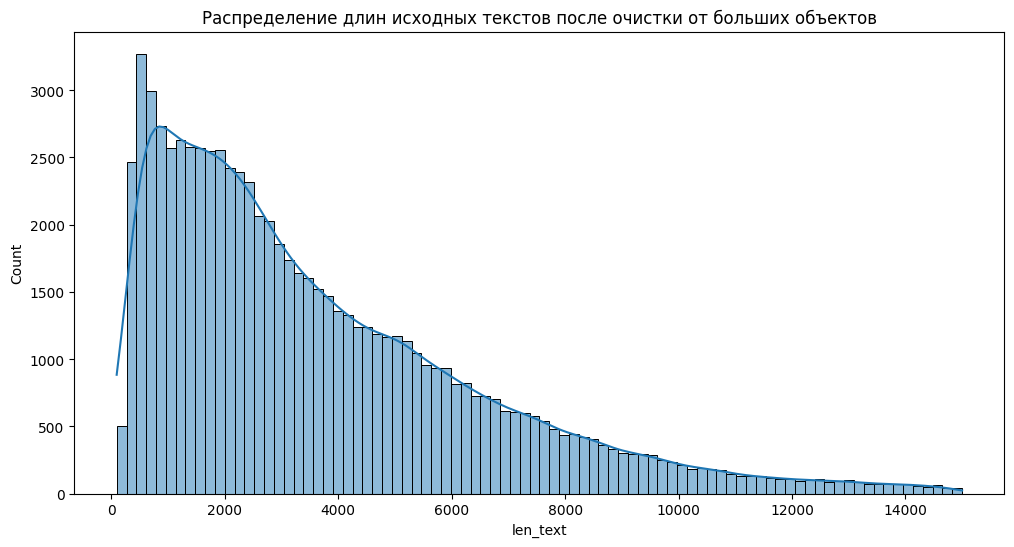

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов после очистки от больших объектов")
sns.histplot(data=df_text, x="len_text", kde=True)

In [72]:
combined_text = " ".join(df_text["text"])
words = combined_text.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в исходных текстах:", len(unique_words))

combined_summarized = " ".join(df_text["summary"])
words = combined_summarized.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в суммаризированных текстах:", len(unique_words))

Количество уникальных слов в исходных текстах: 1280464
Количество уникальных слов в суммаризированных текстах: 185602


In [73]:
df_text = df_text.drop(columns=["len_text", "len_summary"])

In [80]:
df_text.shape

(76556, 2)

In [ ]:
total_data = pd.concat([total_data, df_text.sample(frac=1, random_state=42).reset_index(drop=True)])

In [ ]:
total_data = total_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [85]:
total_data

,text,summary
0,Азаров и Христенко во время подписания Меморан...,Президент Виктор Янукович планирует проинформи...
1,Федеральная служба по финансовым рынкам (ФСФР)...,"У бирж есть пять минут, чтобы сообщить о техни..."
2,Илон Маск - человек с гаргантюанскими планами ...,"Неужели у Илона Маска денег больше, чем здраво..."
3,Финал пятого сезона шоу «Голос. Дети» выпал на...,Рутгер Гарехт из команды Пелагеи стал победите...
4,Премьер-министр Молдавии Ион Кику 23 декабря о...,Премьер Молдавии Ион Кику уходит в отставку. З...
...,...,...
150677,Новые украинские противокорабельные ракеты ком...,"Украина создала уникальное оружие, заставившее..."
150678,По словам исполнительного директора карнавала ...,В Лондоне проходит 53-й карнавал в Ноттинг-хил...
150679,Крупнейшие банки Великобритании выплатят компе...,Британские банки заплатят клиентам компенсацию...
150680,По итогам подсчета примерно половины бюллетене...,"По поступающим сообщениям, правящая Партия спр..."


## <font color="orange"> MLSUM

In [88]:
!pip3 install -q -U datasets --break-system-packages


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python3.12 -m pip install --upgrade pip


In [89]:
dataset_mlsum = load_dataset("mlsum", "ru")

Generating train split:   0%|          | 0/25556 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/750 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/757 [00:00<?, ? examples/s]

In [90]:
train_data = dataset_mlsum['train']
valid_data = dataset_mlsum['validation']
test_data = dataset_mlsum['test']

data_mlsum = concatenate_datasets([train_data, valid_data, test_data])

In [94]:
df_text = pd.DataFrame({
    "text": data_mlsum['text'],
    "summary": data_mlsum['summary']
})

df_text['len_text'] = df_text['text'].transform(lambda x: len(x))
df_text['len_summary'] = df_text['summary'].transform(lambda x: len(x))

<Axes: title={'center': 'Распределение длин исходных текстов'}, xlabel='len_text', ylabel='Count'>

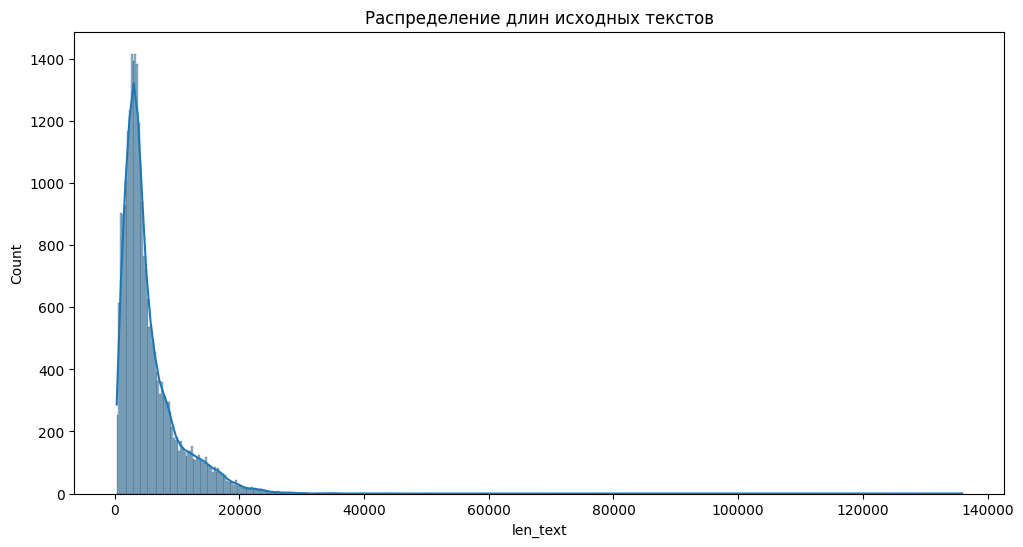

In [95]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов")
sns.histplot(data=df_text, x="len_text", kde=True)

И снова слишком длинные тексты - очищаем

<Axes: title={'center': 'Распределение длин исходных текстов'}, xlabel='len_summary', ylabel='Count'>

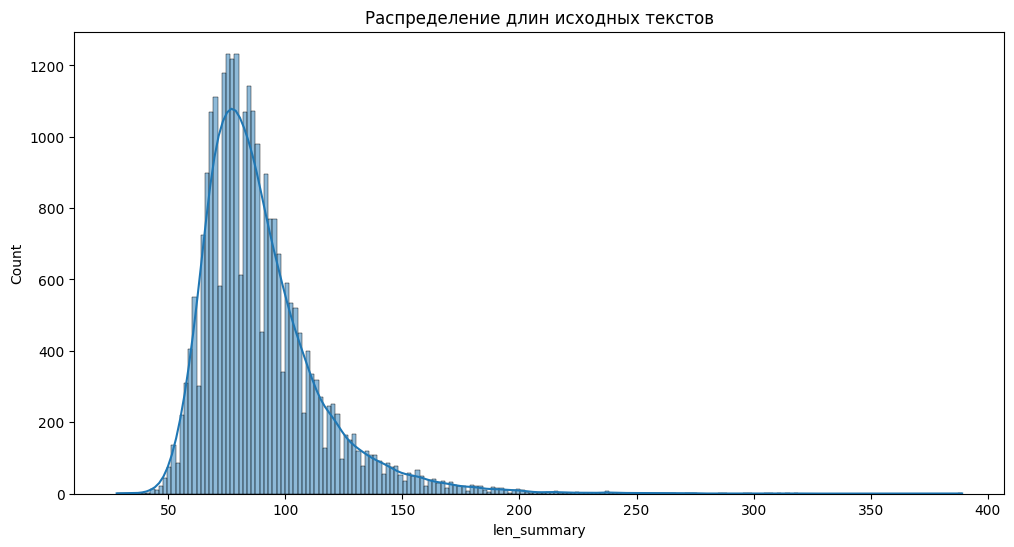

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов")
sns.histplot(data=df_text, x="len_summary", kde=True)

In [97]:
mean = np.mean(df_text["len_text"])
std = np.std(df_text["len_text"])
three_sigma = mean + 3 * std
three_sigma

18936.565006239263

<Axes: title={'center': 'Распределение длин исходных текстов после очистки от больших объектов'}, xlabel='len_text', ylabel='Count'>

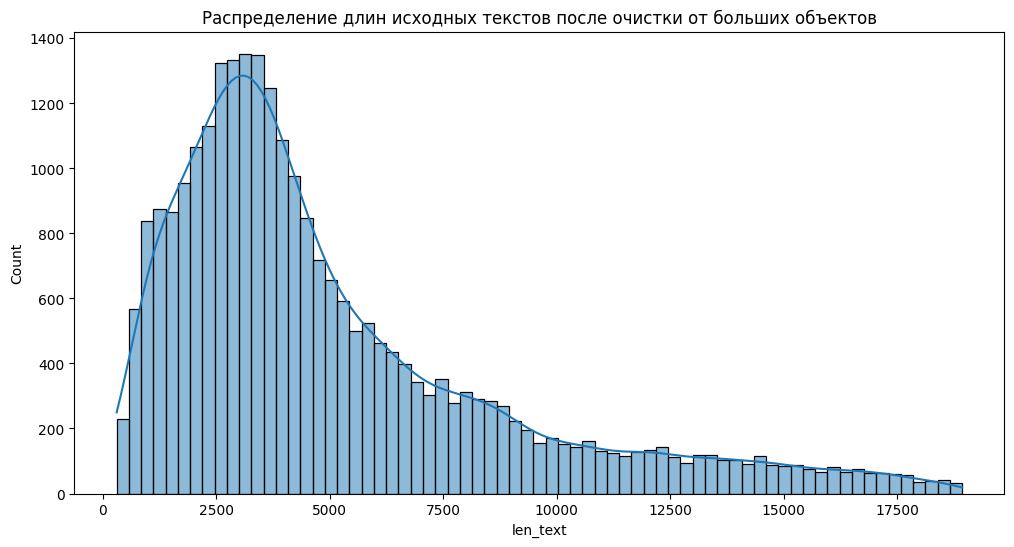

In [98]:
df_text = df_text[df_text['len_text'] <= three_sigma]
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Распределение длин исходных текстов после очистки от больших объектов")
sns.histplot(data=df_text, x="len_text", kde=True)

In [99]:
combined_text = " ".join(df_text["text"])
words = combined_text.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в исходных текстах:", len(unique_words))

combined_summarized = " ".join(df_text["summary"])
words = combined_summarized.split()
words = [word.lower() for word in words]
unique_words = set(words)
print("Количество уникальных слов в суммаризированных текстах:", len(unique_words))

Количество уникальных слов в исходных текстах: 1113480
Количество уникальных слов в суммаризированных текстах: 78069


In [100]:
df_text = df_text.drop(columns=["len_text", "len_summary"])
df_text.shape
total_data = pd.concat([total_data, df_text.sample(frac=1, random_state=42).reset_index(drop=True)])
total_data = total_data.sample(frac=1, random_state=42).reset_index(drop=True)
total_data

,text,summary
0,Гиперзвуковой ракетный комплекс «Авангард» по ...,"Вице-премьер РФ Юрий Борисов, курирующий оборо..."
1,"Покинув Россию, Вороненков начал активно крити...",Президент Украины Петр Порошенко назвал убийст...
2,В Ставропольском крае предотвратили серию тера...,Российские силовики предотвратили серию теракт...
3,Сине-желтый флаг подняли около Киевского горсо...,22 года назад в Киеве рядом со зданием Киевско...
4,На сегодняшний день комплекс выполнил все треб...,Прошлогодний этап Кубка мира был отменен из-за...
...,...,...
177282,Заключительный этап Мировой серии «Рено» (WSR)...,Пилот Team RFR Михаил Алешин стал лучшим из ро...
177283,Роберт Бентли однажды по ошибке отправил своей...,Губернатор Алабамы Роберт Бентли подал в отста...
177284,Сумму в размере полумиллиарда долларов готов п...,Противники властей назвали решение правительст...
177285,Исполняющим обязанности губернатора Липецкой о...,Губернаторы Курганской и Липецкой областей Але...


Сохраним, ура

In [101]:
total_data.to_csv("data.csv")

Далее для получения датасета можно пользоваться командой !wget

In [9]:
#!wget https://drive.google.com/file/d/1HXWncCwH9lGrJ43zVtvF_viYqt6n2goi/view?usp=sharing

## <font color="orange"> Токенизация

In [2]:
df = pd.read_csv("data.csv")

In [7]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
from tqdm import tqdm

texts = df["text"].tolist() + df["summary"].tolist()

tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()

trainer = BpeTrainer(
    vocab_size=30000,
    min_frequency=2,
    special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"]
)

tqdm(tokenizer.train_from_iterator(texts, trainer))
tokenizer.save("bpe_tokenizer.json")

0it [00:00, ?it/s]


In [ ]:
#tokenizer = Tokenizer.from_file("bpe_tokenizer.json")